In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
cd weather/

/content/weather


In [204]:
dataset = pd.read_csv('training.csv', sep = '\t')

In [15]:
dataset

,Date time,Temperature
0,01/01/2011,68.9
1,01/02/2011,66.4
2,01/03/2011,68.7
3,01/04/2011,71.4
4,01/05/2011,69.3
...,...,...
3098,06/26/2019,75.7
3099,06/27/2019,75.0
3100,06/28/2019,72.7
3101,06/29/2019,71.0


In [205]:
dataset = dataset.dropna(subset=["Temperature"])

In [206]:
dataset=dataset.reset_index(drop=True)

In [207]:
training_set = dataset.iloc[:,1:2]

In [208]:
training_set.shape

(3071, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [209]:
sc = MinMaxScaler(feature_range=(0,1))

In [210]:
training_set_scaled = sc.fit_transform(training_set)

In [41]:
training_set_scaled

array([[0.19927536],
       [0.10869565],
       [0.19202899],
       ...,
       [0.33695652],
       [0.27536232],
       [0.26811594]])

In [211]:
x_train = []
y_train = []
n_future = 3 # next 4 days temperature forecast
n_past = 3 # Past 30 days 

In [212]:
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])

In [213]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [214]:
x_train.shape

(3066, 3)

In [215]:
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1))

In [216]:
x_train.shape

(3066, 3, 1)

In [217]:
y_train.shape

(3066, 3)

In [6]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional

In [17]:
import tensorflow as tf 
print(tf.__version__)

2.4.0


In [55]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(x_train, y_train, epochs=500,batch_size=32 )

Epoch 1/500
96/96 [==============================] - 7s 9ms/step - loss: 0.1148 - acc: 0.3198
Epoch 2/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0133 - acc: 0.3500
Epoch 3/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0118 - acc: 0.3273
Epoch 4/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0104 - acc: 0.3517
Epoch 5/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0099 - acc: 0.3430
Epoch 6/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0090 - acc: 0.3419
Epoch 7/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0094 - acc: 0.3339
Epoch 8/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0087 - acc: 0.3358
Epoch 9/500
96/96 [==============================] - 1s 8ms/step - loss: 0.0086 - acc: 0.3601
Epoch 10/500
96/96 [==============================] - 1s 9ms/step - loss: 0.0082 - acc: 0.3378
Epoch 11/500
96/96 [==============================] - 1s 9m

In [57]:
# read test dataset
testdataset = pd.read_csv('testing.csv')

In [80]:
#get only the temperature column
testdataset.iloc[:1,1:2].values

array([[73.4]])

In [60]:
real_temperature = pd.read_csv('testing.csv')
real_temperature = real_temperature.iloc[:,1:2].values
testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

In [73]:
predicted_temperature = regressor.predict(testing)
predicted_temperature = sc.inverse_transform(predicted_temperature)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

In [78]:
len(predicted_temperature)

4

In [69]:
real_temperature = pd.read_csv('testing.csv')
real_temperature.iloc[31:34].values

array([[nan, 81.0]], dtype=object)

In [58]:
predicts = []
times = []

for i in range(30):
  test = testdataset.iloc[:i+1,1:2].values
  testing = sc.transform(test)
  testing = np.array(testing)

  testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))
  predicted_temperature = regressor.predict(testing)
  predicted_temperature = sc.inverse_transform(predicted_temperature)
  predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))
  #time0 = 0
  #for j in predicted_temperature:
    #predicts.append(j[0])
    #times.append(i + time0 + 1)
    #time0 += 1
  predicts.append(predicted_temperature[2][0])  
  times.append(i+1)

In [115]:
times

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

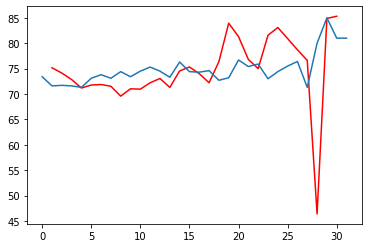

In [61]:
import matplotlib.pyplot as plt
plt.plot(times, predicts, 'r', range(32), real_temperature)

In [62]:
import zipfile

In [65]:
with zipfile.ZipFile('fangfufu-nanning-2016-temp-pressure.zip') as file: 
  file.extractall('dataset/')

In [66]:
!rm -r dataset

In [67]:
!mv -v 'weather-data' dataset

renamed 'weather-data' -> 'dataset'


In [218]:
import glob, os    
df = pd.concat(map(lambda file: pd.read_csv(file, header = None), glob.glob(os.path.join('dataset/', "2016-03-01.csv"))))

In [219]:
df = df.iloc[:,1:5]

In [220]:
df.columns = ['temperature', 'pressure', 'humidity', 'datetime']

In [120]:
df['datetime']

0       2016-03-01 00:00:25+08:00
1       2016-03-01 00:01:14+08:00
2       2016-03-01 00:02:13+08:00
3       2016-03-01 00:03:12+08:00
4       2016-03-01 00:04:13+08:00
                  ...            
1435    2016-03-01 23:55:12+08:00
1436    2016-03-01 23:56:12+08:00
1437    2016-03-01 23:57:11+08:00
1438    2016-03-01 23:58:11+08:00
1439    2016-03-01 23:59:11+08:00
Name: datetime, Length: 1440, dtype: object

In [88]:
df.isna().sum()

temperature    0
pressure       0
humidity       0
datetime       0
dtype: int64

In [221]:
training_set = df.iloc[:,0:1]

In [195]:
training_set.shape

(1440, 1)

In [160]:
sc = MinMaxScaler(feature_range=(0,1))

In [222]:
training_set_scaled = sc.fit_transform(training_set)

In [197]:
training_set_scaled[:,2].mean()

IndexError: ignored

In [223]:
x_train = []
y_train = []
n_future = 180 # next 3 days temperature forecast
n_past =  720 # Past 30 days 

In [224]:
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future])

In [165]:
len(x_train[1])

720

In [225]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [228]:
x_train.shape

(541, 720, 1)

In [227]:
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], x_train.shape[2]))

In [230]:
y_train = np.reshape(y_train, (y_train.shape[0] , y_train.shape[1]))

In [231]:
y_train.shape

(541, 180)

In [233]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],x_train.shape[2]) ) ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(x_train, y_train, epochs=500,batch_size=32 )

Epoch 1/500
17/17 [==============================] - 8s 101ms/step - loss: 0.5586 - acc: 0.0000e+00
Epoch 2/500
17/17 [==============================] - 2s 97ms/step - loss: 0.2607 - acc: 0.0034
Epoch 3/500
17/17 [==============================] - 2s 97ms/step - loss: 0.0970 - acc: 0.0035
Epoch 4/500
17/17 [==============================] - 2s 96ms/step - loss: 0.0655 - acc: 0.0073
Epoch 5/500
17/17 [==============================] - 2s 97ms/step - loss: 0.0586 - acc: 0.0072
Epoch 6/500
17/17 [==============================] - 2s 98ms/step - loss: 0.0525 - acc: 0.0142
Epoch 7/500
 3/17 [====>.........................] - ETA: 1s - loss: 0.0499 - acc: 0.0000e+00

KeyboardInterrupt: ignored

In [358]:
dataset = pd.read_csv('city_temperature.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [359]:
dataset = dataset.loc[(dataset.City == 'Moscow') & (dataset.Year != 2020)]

In [360]:
training_set = dataset.iloc[:,7:8]

In [361]:
training_set

,AvgTemperature
878256,32.3
878257,31.7
878258,26.8
878259,15.9
878260,23.8
...,...
887383,30.4
887384,29.3
887385,25.3
887386,26.7


In [42]:
import matplotlib.pyplot as plt

In [67]:
dataset[dataset.Year == 2019]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
887023,Europe,Russia,NaN,Moscow,1,1,2019,24.3
887024,Europe,Russia,NaN,Moscow,1,2,2019,26.6
887025,Europe,Russia,NaN,Moscow,1,3,2019,26.4
887026,Europe,Russia,NaN,Moscow,1,4,2019,23.1
887027,Europe,Russia,NaN,Moscow,1,5,2019,21.3
...,...,...,...,...,...,...,...,...
887383,Europe,Russia,NaN,Moscow,12,27,2019,30.4
887384,Europe,Russia,NaN,Moscow,12,28,2019,29.3
887385,Europe,Russia,NaN,Moscow,12,29,2019,25.3
887386,Europe,Russia,NaN,Moscow,12,30,2019,26.7


In [71]:
from sklearn.preprocessing import MinMaxScaler

In [315]:
sc = MinMaxScaler(feature_range=(0,1))

In [316]:
training_set_scaled = sc.fit_transform(training_set)

In [317]:
training_set_scaled = np.round(training_set_scaled,2)

In [318]:
x_train = []
y_train = []
n_future = 1 # next 4 days temperature forecast
n_past = 3 # Past 30 days 

In [319]:
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])

In [320]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1))

In [362]:
x_train.shape

(9129, 3, 1)

In [176]:
training_set_scaled[0:10]

array([[0.7 ],
       [0.7 ],
       [0.68],
       [0.62],
       [0.66],
       [0.61],
       [0.61],
       [0.63],
       [0.62],
       [0.58]])

In [178]:
x_train[1]

array([[0.7 ],
       [0.68],
       [0.62],
       [0.66],
       [0.61],
       [0.61],
       [0.63]])

In [177]:
y_train

array([[0.63],
       [0.62],
       [0.58],
       ...,
       [0.67],
       [0.67],
       [0.71]])

In [321]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional, Activation
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=3, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 3 , return_sequences=True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 3 , return_sequences=True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 3 , return_sequences=True))
#regressor.add(Dropout(0.2))


regressor.add(LSTM(units= 3))
regressor.add(Dense(units = n_future,activation='linear'))
#regressor.add(Activation("relu"))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=100,batch_size=32 )

Epoch 1/100
286/286 [==============================] - 11s 10ms/step - loss: 0.3271
Epoch 2/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0114
Epoch 3/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0098
Epoch 4/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0053
Epoch 5/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0030
Epoch 6/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0030
Epoch 7/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0033
Epoch 8/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0033
Epoch 9/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0027
Epoch 10/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0032
Epoch 11/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0030
Epoch 12/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0039


In [135]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional, Activation, GRU
regressor = Sequential()
regressor.add(GRU(units=3, return_sequences=True, input_shape = (x_train.shape[1],1)))
regressor.add(Dense(units = n_future,activation='sigmoid'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(x_train, y_train, epochs=500,batch_size=32 )

Epoch 1/500


ValueError: ignored

In [101]:
lstm_layer1 = GRU(units=7, return_sequences=True, input_shape = (x_train.shape[1],1))

In [114]:
x1 = lstm_layer1(x_train)

In [105]:
lstm_layer2 = GRU(units=7, return_sequences=True, input_shape = (x_train.shape[1],7))

In [115]:
x1 = lstm_layer2(x1)

In [110]:
layer3 = Dense(units = n_future,activation='relu')

In [117]:
x1.shape

TensorShape([9123, 7, 7])

In [119]:
x1 = layer3(x1)

In [120]:
layer4 = Dense(units = n_future,activation='sigmoid')

In [ ]:
layer4(x1)

In [124]:
x_train.shape

(9123, 7, 1)

In [368]:
dataset_test = pd.read_csv('city_temperature.csv')
ds = dataset_test.loc[(dataset_test.City == 'Moscow') & (dataset_test.Year == 2020)].iloc[:,7:8].round(3)
training_set_scaled = sc.fit_transform(dataset_test.loc[(dataset_test.City == 'Moscow') & (dataset_test.Year == 2020)].iloc[:,7:8].round(3))[0:132]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [371]:
x_test = []
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_test.append(training_set_scaled[i : i + n_past , 0])     
   
x_test  = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1], 1))

In [372]:
x_test.shape

(129, 3, 1)

In [373]:
training_set_scaled.shape

(132, 1)

In [352]:
training_set_scaled = training_set_scaled.reshape(-1,3,1)

In [214]:
dataset.loc[(dataset.City == 'Moscow') & (dataset.Year == 2020)]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
887388,Europe,Russia,NaN,Moscow,1,1,2020,29.2
887389,Europe,Russia,NaN,Moscow,1,2,2020,32.3
887390,Europe,Russia,NaN,Moscow,1,3,2020,32.7
887391,Europe,Russia,NaN,Moscow,1,4,2020,30.1
887392,Europe,Russia,NaN,Moscow,1,5,2020,31.6
...,...,...,...,...,...,...,...,...
887517,Europe,Russia,NaN,Moscow,5,9,2020,52.7
887518,Europe,Russia,NaN,Moscow,5,10,2020,55.6
887519,Europe,Russia,NaN,Moscow,5,11,2020,59.5
887520,Europe,Russia,NaN,Moscow,5,12,2020,61.5


In [376]:
predicted_temperature = regressor.predict(x_test)
predicted_temperature = sc.inverse_transform(predicted_temperature)
#predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

In [279]:
predicted_temperature = list(map(lambda x: x[2], predicted_temperature))

In [377]:
predicted_temperature.shape

(129, 1)

In [378]:
predicted_temperature

array([[38.574146],
       [37.89325 ],
       [38.03286 ],
       [37.931133],
       [37.700974],
       [38.313522],
       [38.581017],
       [38.271744],
       [38.062763],
       [37.401615],
       [38.441223],
       [38.71669 ],
       [38.41022 ],
       [39.101612],
       [39.46768 ],
       [38.083004],
       [37.55575 ],
       [38.58405 ],
       [39.374912],
       [38.080536],
       [36.92093 ],
       [37.73691 ],
       [38.971687],
       [38.283546],
       [37.874252],
       [37.332157],
       [38.103493],
       [38.74005 ],
       [38.09351 ],
       [37.861313],
       [38.353706],
       [38.80544 ],
       [37.6056  ],
       [36.953808],
       [37.346584],
       [37.42253 ],
       [37.452415],
       [38.494713],
       [39.253284],
       [38.64652 ],
       [38.20551 ],
       [37.530228],
       [38.07408 ],
       [38.322857],
       [38.02985 ],
       [39.69144 ],
       [40.518147],
       [39.338577],
       [39.159172],
       [38.779884],


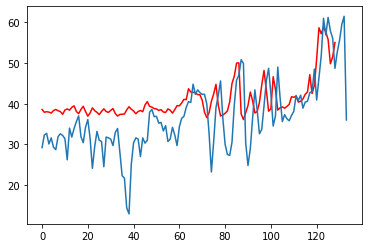

In [384]:
plt.plot(range(129), predicted_temperature, 'r', range(134), ds)

In [385]:
!git init

Initialized empty Git repository in /content/weather/.git/


In [ ]:
!git add .

In [389]:
!git commit -m "Start experiments"

On branch master

Initial commit

Untracked files:
	city_temperature.csv

nothing added to commit but untracked files present


In [387]:
!git config --global user.email "andron@alexanyan.tech"

In [388]:
!git config --global user.name "andron23"